In [21]:
%reload_ext autoreload

%autoreload 2


In [22]:
input_file = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/evidence.txt.maxquant_evidence_andre_benchmark.aq_reformat.tsv"
maxquant_file = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/proteinGroups.txt"
directlfq_file = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/evidence.txt.maxquant_evidence_andre_benchmark.aq_reformat.tsv.protein_intensities.tsv"
iq_file = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/iq-MaxLFQ-fast.txt"

samplemap_lfq = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/samplemap_lfq.tsv"
samplemap_directlfq = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/samplemap_directlfq.tsv"

protein_group_file = "../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/proteinGroups.txt"

run_directlfq = True

In [23]:
import warnings
warnings.filterwarnings('ignore')

if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="maxquant_evidence_andre_benchmark", min_nonan=2)



to few values for normalization without missing values. Including missing values
prot 100 of 4406
prot 200 of 4406
prot 300 of 4406
prot 400 of 4406
prot 500 of 4406
prot 600 of 4406
prot 700 of 4406
prot 800 of 4406
prot 900 of 4406
prot 1000 of 4406
prot 1100 of 4406
prot 1200 of 4406
prot 1300 of 4406
prot 1400 of 4406
prot 1500 of 4406
prot 1600 of 4406
prot 1700 of 4406
prot 1800 of 4406
prot 1900 of 4406
prot 2000 of 4406
prot 2100 of 4406
prot 2200 of 4406
prot 2300 of 4406
prot 2400 of 4406
prot 2500 of 4406
prot 2600 of 4406
prot 2700 of 4406
prot 2800 of 4406
prot 2900 of 4406
prot 3000 of 4406
prot 3100 of 4406
prot 3200 of 4406
prot 3300 of 4406
prot 3400 of 4406
prot 3500 of 4406
prot 3600 of 4406
prot 3700 of 4406
prot 3800 of 4406
prot 3900 of 4406
prot 4000 of 4406
prot 4100 of 4406
prot 4200 of 4406
prot 4300 of 4406
prot 4400 of 4406


In [24]:
import directlfq.benchmarking as lfqbenchmark

restable_iq = lfqbenchmark.ResultsTableBiological(results_file=iq_file, samplemap=samplemap_directlfq, name="iQ")
restable_iq.results_df = 2**restable_iq.results_df.set_index(["protein", "MaxLFQ_annotation"])
restable_iq.results_df = restable_iq.results_df.reset_index()
cvinfo_iq = lfqbenchmark.CVInfoDataset(restable_iq)

In [25]:

restable_directlfq = lfqbenchmark.ResultsTableBiological(results_file=directlfq_file, samplemap=samplemap_directlfq, name="directLFQ")
cvinfo_directlfq = lfqbenchmark.CVInfoDataset(restable_directlfq)

In [26]:
import directlfq.benchmarking as lfqbenchmark
restable_maxlfq = lfqbenchmark.ResultsTableBiological(results_file=maxquant_file, samplemap=samplemap_lfq, name = "maxLFQ")
cvinfo_maxlfq = lfqbenchmark.CVInfoDataset(restable_maxlfq)

8662 are very large for directLFQ
834886
0.16673271855268582
0.1280552384352872
19823 are very large for maxLFQ
817715
0.16741437459027145
0.12276442573061332
64144 are very large for iQ
1217695
0.21772544611116212
0.17608546819891868


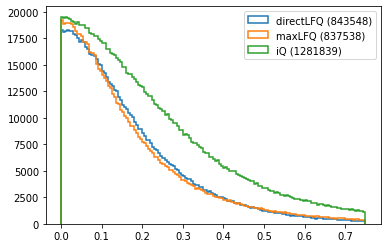

In [30]:
import matplotlib.pyplot as plt
ax = plt.subplot()
lfqbenchmark.CVDistributionPlotter(list_of_dataset_cv_infos=[cvinfo_directlfq, cvinfo_maxlfq, cvinfo_iq], ax = ax,cumulative=False, density=False, bins=150)
ax.legend()
outfile = f"../../test_data/system_tests/maxquant_yeast_interactome/1_Final_run_5x_1800_files/#1/twofilt_density_false.pdf"
plt.savefig(outfile)
